Sample Movie Dataset:
     Rating  Duration      Budget   BoxOffice   Genre
0  4.370861       176  192.905896  603.419043  Action
1  9.556429        80  171.336844  538.151903  Comedy
2  7.587945        98   62.417534   53.737349  Comedy
3  6.387926        81   80.094057  293.058963   Drama
4  2.404168       132  170.971651  387.829238  Action


/tmp/ipython-input-1031370184.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df, palette='Set2')


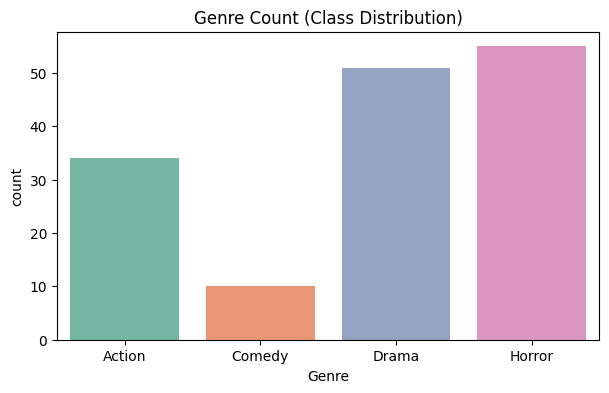

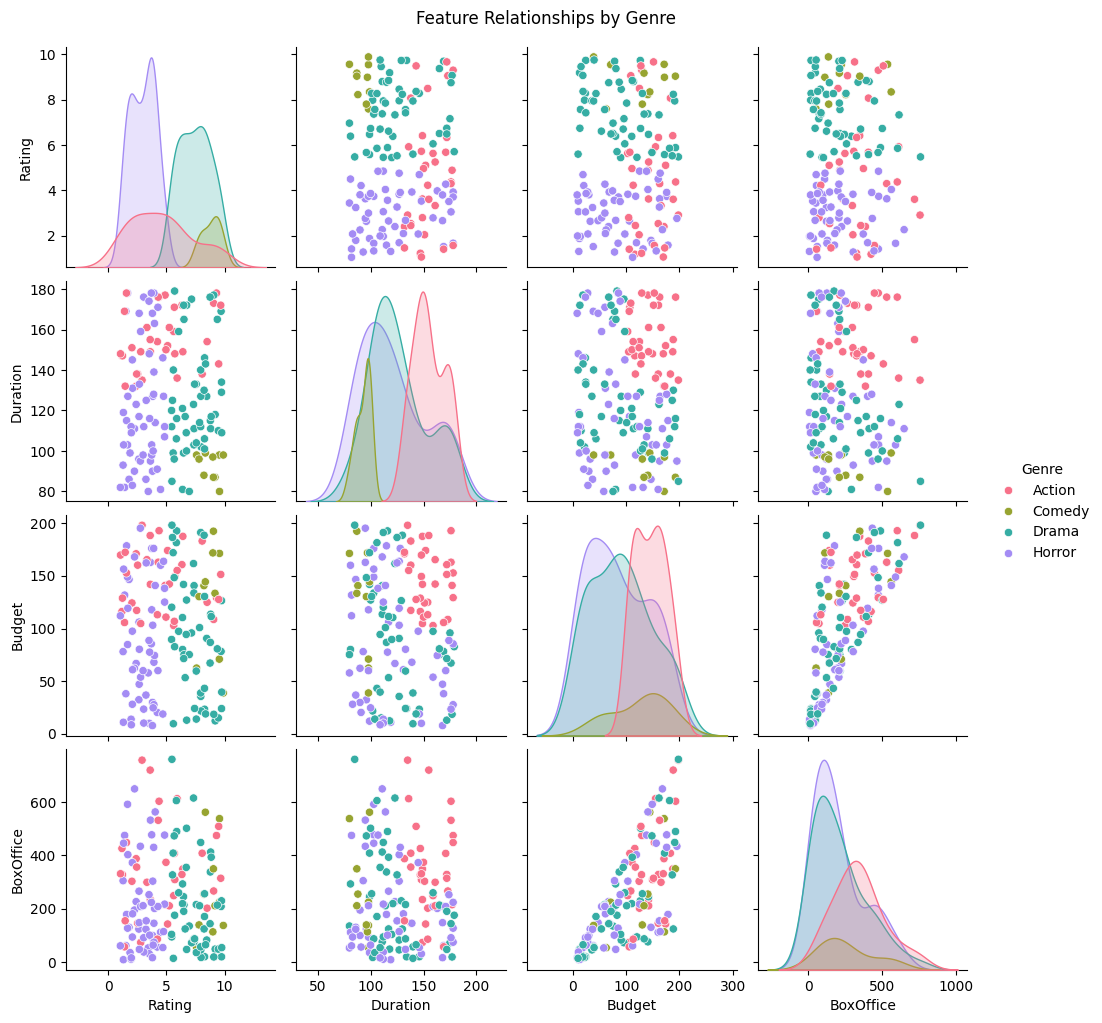


Model Accuracy: 81.58%


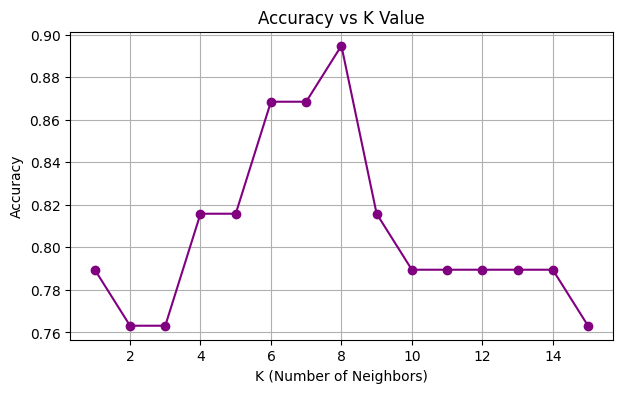

Best K Value: 8

Enter movie details to predict its genre:
Enter Rating (1-10): 5
Enter Duration (in minutes): 120
Enter Budget (in millions): 10
Enter Box Office (in millions): 20

Predicted Movie Genre: Horror

Project Completed Successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Simple KNN K's Nearest Neighbour Project: Movie Genre Prediction

# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Create a simple synthetic movie dataset

np.random.seed(42)
num_movies = 150  # number of movies

# Generate random data
ratings = np.random.uniform(1, 10, num_movies)
durations = np.random.randint(80, 180, num_movies)
budgets = np.random.uniform(5, 200, num_movies)
box_office = budgets * np.random.uniform(0.5, 4, num_movies)

# Assign genres based on simple conditions
genres = []
for i in range(num_movies):
    if ratings[i] > 7 and durations[i] < 100:
        genres.append('Comedy')
    elif budgets[i] > 100 and durations[i] > 130:
        genres.append('Action')
    elif ratings[i] < 5:
        genres.append('Horror')
    else:
        genres.append('Drama')

# Create DataFrame
df = pd.DataFrame({
    'Rating': ratings,
    'Duration': durations,
    'Budget': budgets,
    'BoxOffice': box_office,
    'Genre': genres
})

print("Sample Movie Dataset:")
print(df.head())

# Step 2: Data Visualization

plt.figure(figsize=(7, 4))
sns.countplot(x='Genre', data=df, palette='Set2')
plt.title("Genre Count (Class Distribution)")
plt.show()

sns.pairplot(df, hue='Genre', diag_kind='kde', palette='husl')
plt.suptitle("Feature Relationships by Genre", y=1.02)
plt.show()

# Step 3: Prepare data for KNN

X = df[['Rating', 'Duration', 'Budget', 'BoxOffice']]
y = df['Genre']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train and evaluate KNN model

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Step 5: Visualize accuracy for different K values

k_values = range(1, 16)
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracy_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(7, 4))
plt.plot(k_values, accuracy_scores, marker='o', color='purple')
plt.title("Accuracy vs K Value")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K Value: {best_k}")

# Step 6: Predict genre for a new movie

print("\nEnter movie details to predict its genre:")
rating = float(input("Enter Rating (1-10): "))
duration = float(input("Enter Duration (in minutes): "))
budget = float(input("Enter Budget (in millions): "))
box = float(input("Enter Box Office (in millions): "))

new_movie = np.array([[rating, duration, budget, box]])
new_movie_scaled = scaler.transform(new_movie)
predicted_genre = knn.predict(new_movie_scaled)[0]

print(f"\nPredicted Movie Genre: {predicted_genre}")

print("\nProject Completed Successfully!")
